In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data_directory='C:/Users/DeLL/Downloads/archive (16)/melanoma_cancer_dataset/train/malignan/t'
folder_path='/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'
data_directory1='/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/malignant'

In [ ]:
train_data='/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/'


In [ ]:
train_data


'/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/'

       Class  Num_Images  Mean_Height  Mean_Width  Min_Height  Min_Width  \
0     benign        5000        300.0       300.0         300        300   
1  malignant        4605        300.0       300.0         300        300   

   Max_Height  Max_Width  
0         300        300  
1         300        300  


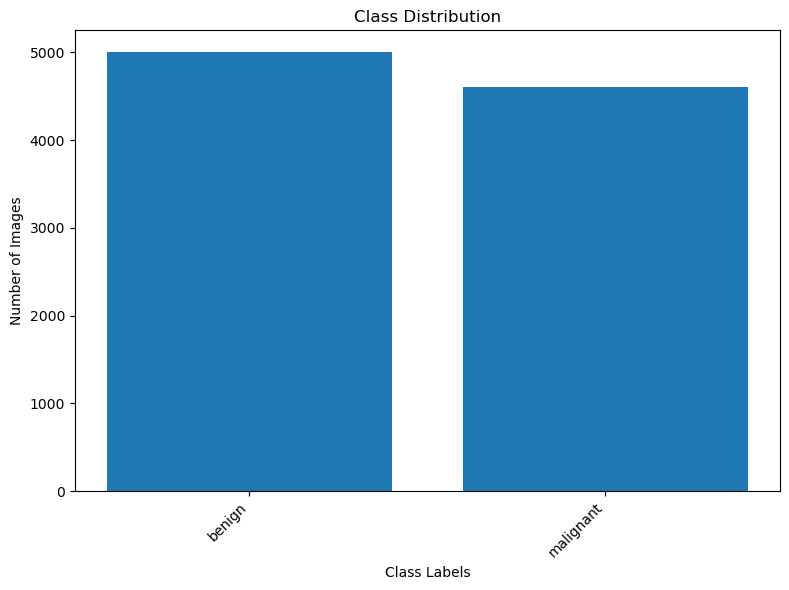

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the dataset directory
# data_directory = 'F:\Dataset\COVID-19_Radiography_Dataset'  # Update with the actual path to your dataset

# Function to load the dataset and extract image statistics
def get_image_stats(train_data):
    class_labels = ['benign', 'malignant']
    image_stats = []

    for label in class_labels:
        class_dir = os.path.join(train_data, label)
        num_images = len(os.listdir(class_dir))
        image_sizes = []

        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            height, width = image.shape
            image_sizes.append((height, width))

        image_sizes = np.array(image_sizes)
        mean_height, mean_width = np.mean(image_sizes, axis=0)
        min_height, min_width = np.min(image_sizes, axis=0)
        max_height, max_width = np.max(image_sizes, axis=0)

        image_stats.append({
            'Class': label,
            'Num_Images': num_images,
            'Mean_Height': mean_height,
            'Mean_Width': mean_width,
            'Min_Height': min_height,
            'Min_Width': min_width,
            'Max_Height': max_height,
            'Max_Width': max_width
        })

    return image_stats

# Get data summary
data_summary = get_image_stats(train_data)

# Convert data summary to a pandas DataFrame for easier visualization
data_summary_df = pd.DataFrame(data_summary)

# Display the data summary
print(data_summary_df)

# Plot bar chart for class distribution
plt.figure(figsize=(8, 6))
plt.bar(data_summary_df['Class'], data_summary_df['Num_Images'])
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_dir=class_dir = os.path.join(train_data, label="benign")
class_dir


TypeError: join() got an unexpected keyword argument 'label'

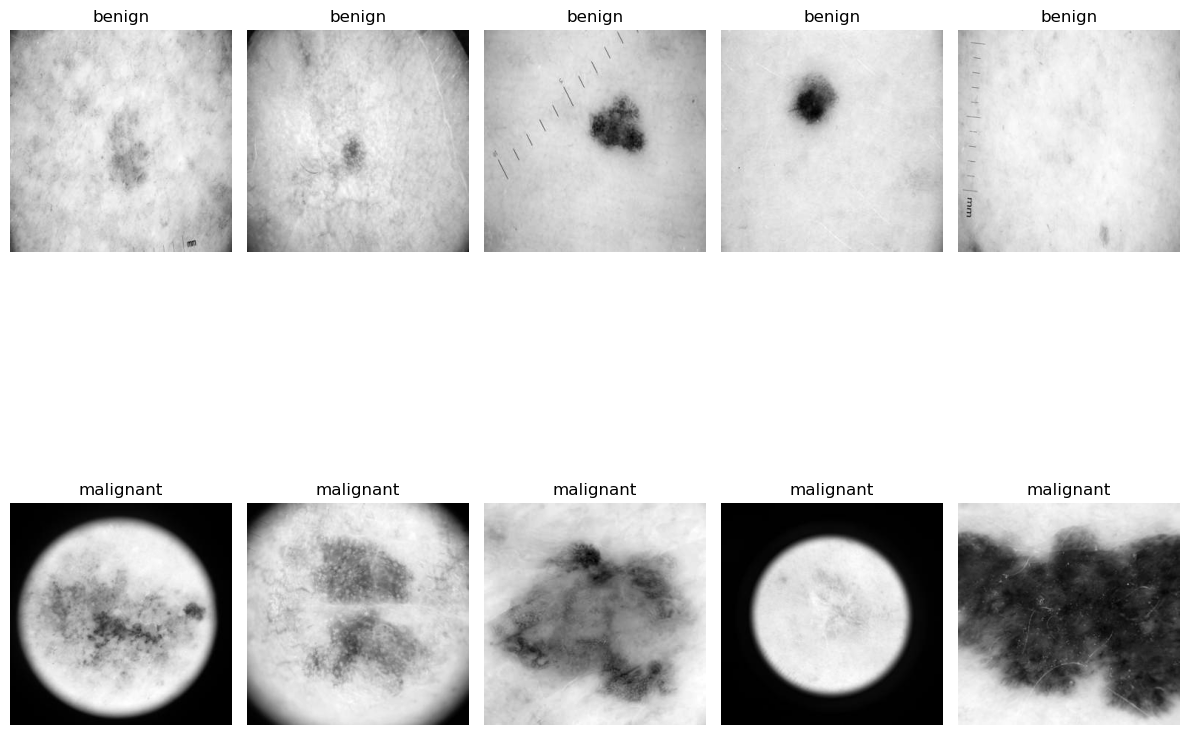

In [ ]:
# data_directory = 'F:\Dataset\COVID-19_Radiography_Dataset'
def load_sample_images(data_dir, num_samples=5):
    class_labels = ['benign', 'malignant']
    sample_images = []

    for label in class_labels:
        class_dir = os.path.join(train_data, label)
        image_files = os.listdir(class_dir)
        sample_files = np.random.choice(image_files, num_samples, replace=False)

        for image_file in sample_files:
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            sample_images.append((label, image))

    return sample_images

# Load sample X-ray images
num_samples_per_class = 5
sample_images = load_sample_images(data_directory, num_samples=num_samples_per_class)

fig, axes = plt.subplots(len(sample_images) // num_samples_per_class, num_samples_per_class, figsize=(12, 12))
for i, (label, image) in enumerate(sample_images):
    row = i // num_samples_per_class
    col = i % num_samples_per_class
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(label)

# Display the plot
plt.tight_layout()
plt.show()

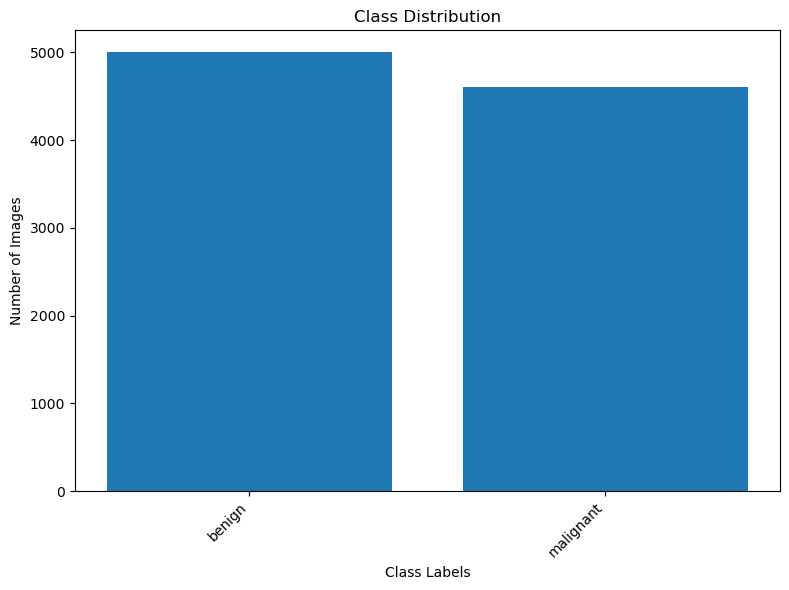

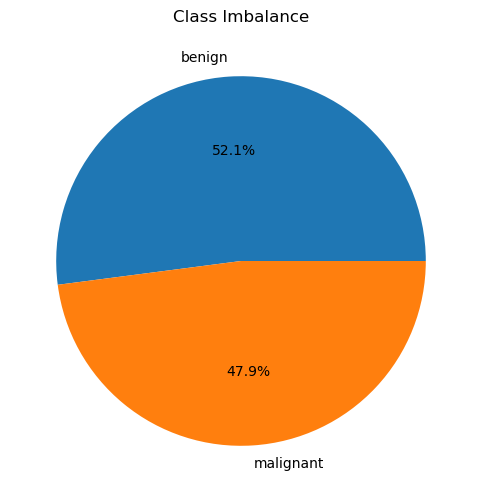

In [ ]:
# Calculate class distribution and visualize class imbalance
class_labels = ['benign', 'malignant']
num_images_per_class = [len(os.listdir(os.path.join(train_data, label))) for label in class_labels]

# Plot bar chart for class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, num_images_per_class)
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize class imbalance (if any) with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(num_images_per_class, labels=class_labels, autopct='%1.1f%%')
plt.title('Class Imbalance')
plt.show()

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Data Preprocessing: Resizing
image_size = (128, 128)  # Choose the desired image size for resizing

def resize_images(train_data, image_size):
    X, y = [], []
    class_labels = ['benign', 'malignant']
    for i, label in enumerate(class_labels):
        class_dir = os.path.join(train_data, label)
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, image_size)
            X.append(image)
            y.append(i)

    X = np.array(X)
    y = np.array(y)
    return X, y

# Load and preprocess the data
# data_directory='F:\Dataset\COVID-19_Radiography_Dataset'
X, y = resize_images(train_data, image_size)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
# Data Augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert the class labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Check the data shapes after preprocessing and augmentation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

X_train shape: (7684, 128, 128)
y_train shape: (7684, 2)
X_test shape: (1921, 128, 128)
y_test shape: (1921, 2)


In [ ]:
X.shape, y.shape

((9605, 128, 128), (9605,))

In [ ]:
X_train.shape, y_train.shape

((7684, 128, 128), (7684, 2))

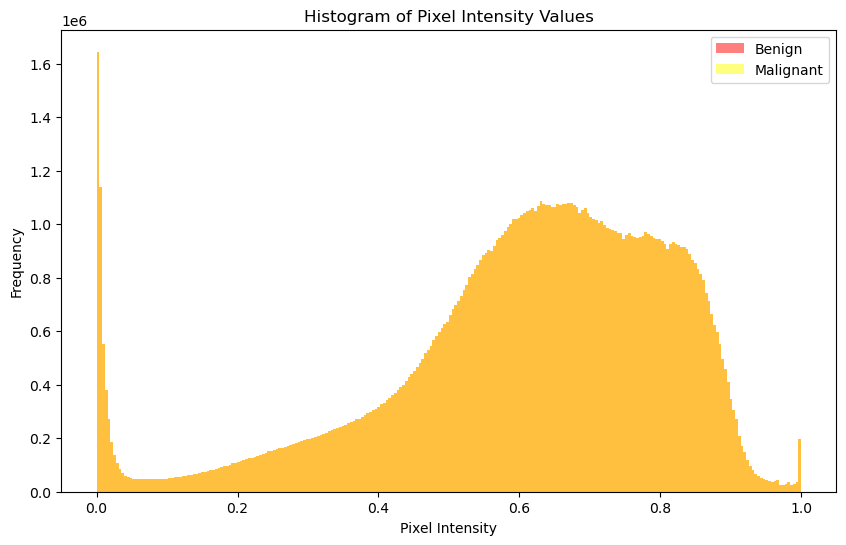

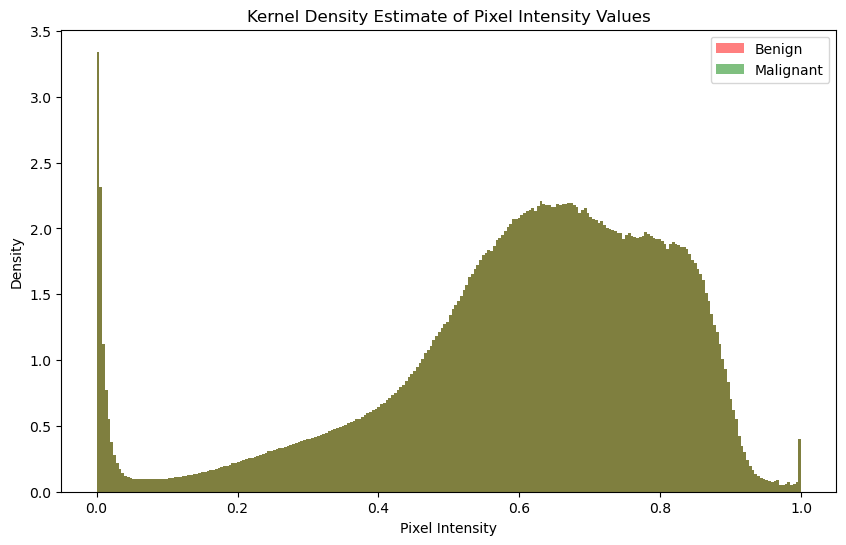

In [ ]:
y_train = np.squeeze(y_train)
y_train = y_train.astype(int)

covid_indices = np.where(y_train == 0)[0]
viral_pneumonia_indices = np.where(y_train == 1)[0]
normal_indices = np.where(y_train == 2)[0]

covid_images = X_train[covid_indices]
viral_pneumonia_images = X_train[viral_pneumonia_indices]
normal_images = X_train[normal_indices]

# Plot histograms of pixel intensity values
plt.figure(figsize=(10, 6))
plt.hist(covid_images.flatten(), bins=256, alpha=0.5, label='Benign', color='red')
plt.hist(viral_pneumonia_images.flatten(), bins=256, alpha=0.5, label='Malignant', color='yellow')
# plt.hist(normal_images.flatten(), bins=256, alpha=0.5, label='Normal', color='green')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity Values')
plt.legend()
plt.show()

# Alternatively, you can plot kernel density estimates (KDE)
plt.figure(figsize=(10, 6))
plt.hist(covid_images.flatten(), bins=256, density=True, alpha=0.5, label='Benign', color='red')
plt.hist(viral_pneumonia_images.flatten(), bins=256, density=True, alpha=0.5, label='Malignant', color='green')
# plt.hist(normal_images.flatten(), bins=256, density=True, alpha=0.5, label='Normal', color='green')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Pixel Intensity Values')
plt.legend()
plt.show()